## BOSTON HOUSING

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

In [6]:
df = pd.read_excel('boston.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [7]:
df.info()                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM     506 non-null float64
ZN       506 non-null float64
INDUS    506 non-null float64
CHAS     506 non-null int64
NOX      506 non-null float64
RM       506 non-null float64
AGE      506 non-null float64
DIS      506 non-null float64
RAD      506 non-null int64
TAX      506 non-null int64
PT       506 non-null float64
B        506 non-null float64
LSTAT    506 non-null float64
MV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


info() func. shows no missing values in the dataset.

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [9]:
df.shape

(506, 14)

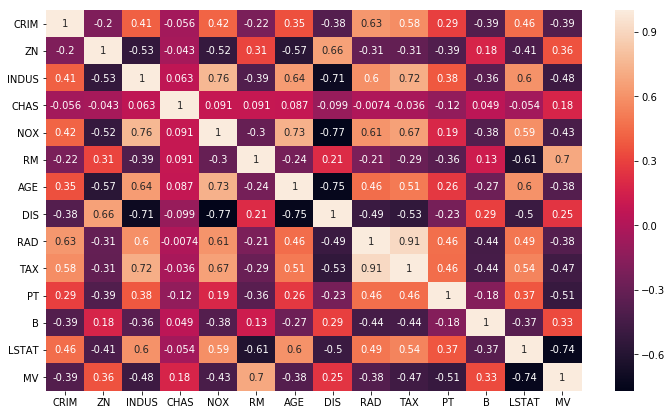

In [5]:
plt.figure(figsize=(12,7))
correlation = df.corr()
sns.heatmap(correlation,annot=True)

In [18]:
correlation['MV'][abs(correlation['MV']).sort_values(ascending=False).index]
#correlation['MV'].argsort()

MV       1.000000
LSTAT   -0.737663
RM       0.695360
PT      -0.507787
INDUS   -0.483725
TAX     -0.468536
NOX     -0.427321
CRIM    -0.388305
RAD     -0.381626
AGE     -0.376955
ZN       0.360445
B        0.333461
DIS      0.249929
CHAS     0.175260
Name: MV, dtype: float64

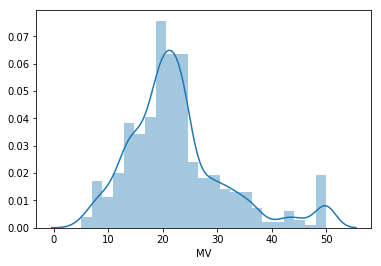

In [12]:
sns.distplot(df['MV'])

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

linreg = LinearRegression()
df1 = df.copy()
y= df1['MV']
del(df1['MV'])
X=df1

C:\Users\132004\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from pylab import rcParams
def train_and_predict(X,y,model):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("MSE for the model is:",mean_squared_error(y_test,y_pred))
    
    rcParams['figure.figsize'] = (15,5)
    f, axes = plt.subplots(1,2)
    plt.subplots_adjust(wspace= 0.2)
    ax1=plt.subplot(121)
    plt.plot([0, 50], [0, 50], '--k')
    plt.scatter(y_test, y_pred)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    
    ax2=plt.subplot(122)
    plt.scatter(y_pred,y_pred-y_test)
    plt.axhline(y=0,color='r')
    plt.title("Residuals")
    plt.xlabel("Predicted prices: $\hat{Y}_i$")
    plt.ylabel("Residuals: $\hat{Y}_i$-$Y_i$")
    # print("\n Linear Regressionn coefficients for features:\n",model.coef_)

In [10]:
def cross_validation(X,y,model):
    score_lr = cross_val_score(model, X, y, cv=5)
    print("Model Cross Validation score : " + str(score_lr))
    print("Model Cross Validation Mean score : " + str(score_lr.mean()))

# Linear Regression

MSE for the model is: 25.549197516


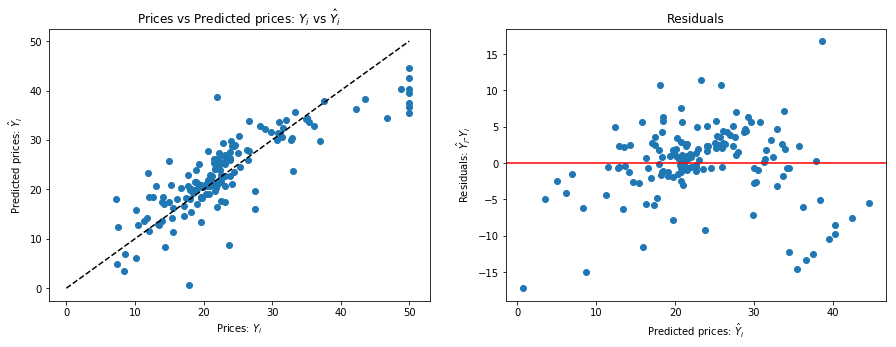

In [11]:
#Considering all the features as input variable
linreg = LinearRegression()
train_and_predict(X,y,linreg)

In [12]:
cross_validation(X,y,linreg)

Model Cross Validation score : [ 0.63919994  0.71386696  0.58702343  0.07923082 -0.25294166]
Model Cross Validation Mean score : 0.353275898103


MSE for the model is: 27.9539722877


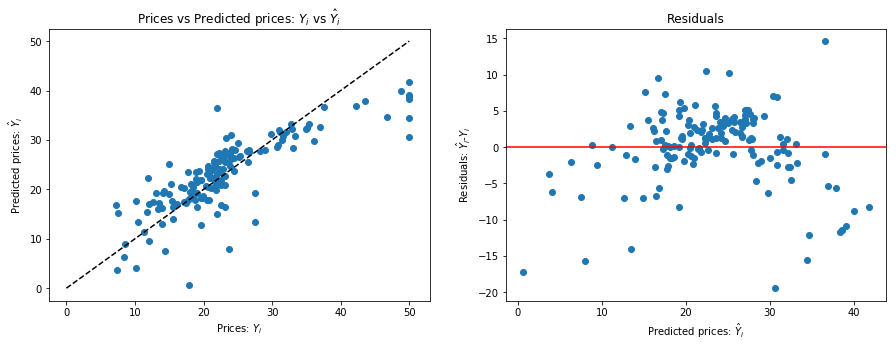

In [13]:
X1 = df[['LSTAT','PT','RM','INDUS']]
linreg2 = LinearRegression()
train_and_predict(X1,y,linreg2)

# Decision Tree

MSE for the model is: 17.49236936


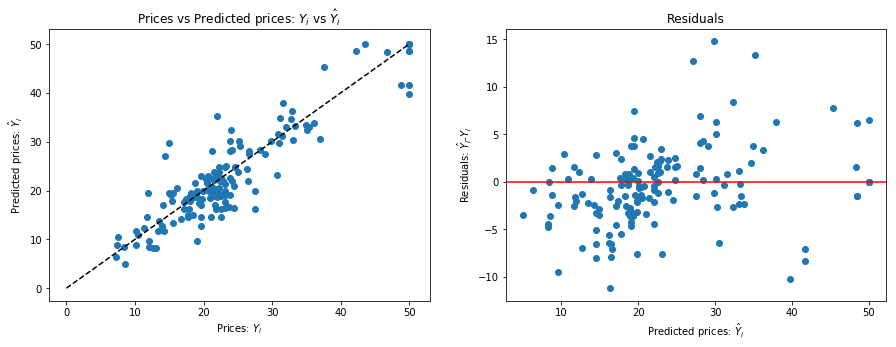

In [14]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
train_and_predict(X,y,tree)

MSE for the model is: 19.6579613328


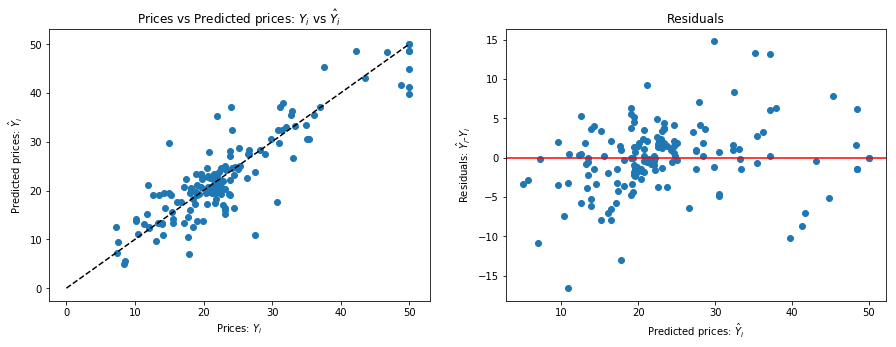

In [15]:
tree1=DecisionTreeRegressor()
train_and_predict(X1,y,tree1)

# PCA 

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=13)
X = StandardScaler().fit_transform(X)
pca.fit(X)
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([ 0.47129607,  0.11025193,  0.0955859 ,  0.06596732,  0.06421661,
        0.05056978,  0.04118124,  0.03046902,  0.02130333,  0.01694137,
        0.0143088 ,  0.0130233 ,  0.00488533])

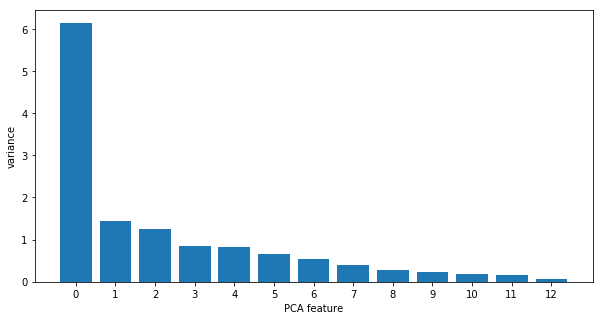

In [27]:
plt.figure(figsize=[10,5])
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [28]:
pca.explained_variance_

array([ 6.13898128,  1.43611332,  1.24507726,  0.85927329,  0.83646901,
        0.65870895,  0.53641619,  0.39688166,  0.27749172,  0.22067393,
        0.18638271,  0.16963822,  0.06363502])

[  47.13   58.16   67.72   74.32   80.74   85.8    89.92   92.97   95.1
   96.79   98.22   99.52  100.01]


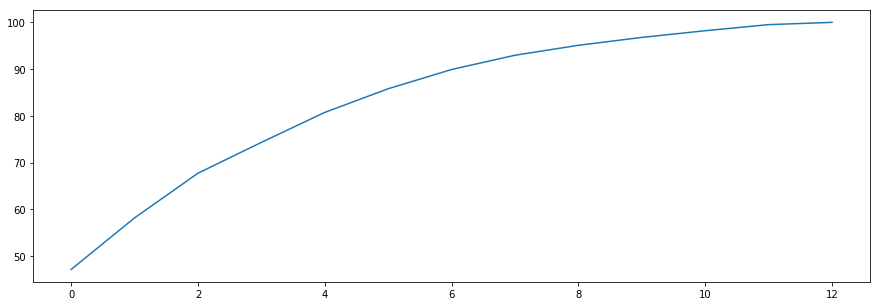

In [29]:
variance_ratio_cum_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)
plt.plot(variance_ratio_cum_sum)

In [41]:
pca = PCA(n_components=8)
Transformed_vector =pca.fit_transform(X)
pca.fit(Transformed_vector)
print(Transformed_vector)

[[-2.09829751  0.77311261  0.34294243 ..., -0.31533812  0.31864066
   0.29583195]
 [-1.45725171  0.59198534 -0.69519915 ...,  0.26422313  0.55386123
  -0.22366993]
 [-2.07459759  0.59963945  0.16712178 ...,  0.44809469  0.48455996
   0.10516625]
 ..., 
 [-0.3123604   1.15524646 -0.40859743 ...,  0.46794676  0.29411932
  -0.63866022]
 [-0.27051909  1.04136174 -0.58545372 ...,  0.48225939  0.27159709
  -0.57934454]
 [-0.12580323  0.76197816 -1.2948816  ...,  0.40147361  0.17530967
  -0.1333821 ]]


In [42]:
pca.explained_variance_ratio_

array([ 0.50702192,  0.11860941,  0.10283163,  0.07096786,  0.06908445,
        0.05440314,  0.04430291,  0.03277868])

In [43]:
cross_validation(Transformed_vector,y,linreg)

Model Cross Validation score : [ 0.77132029  0.72426301  0.66902786  0.20909818  0.00982889]
Model Cross Validation Mean score : 0.476707645709


MSE for the model is: 27.4537704768


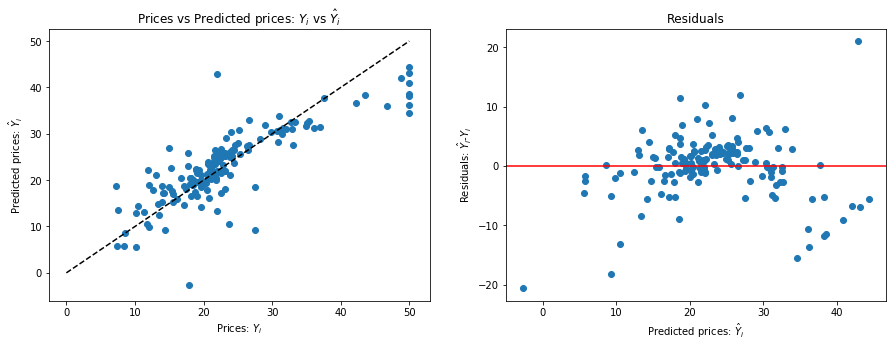

In [44]:
#PCA on Linear Regression Model
train_and_predict(Transformed_vector,y,linreg)

MSE for the model is: 34.9860524847


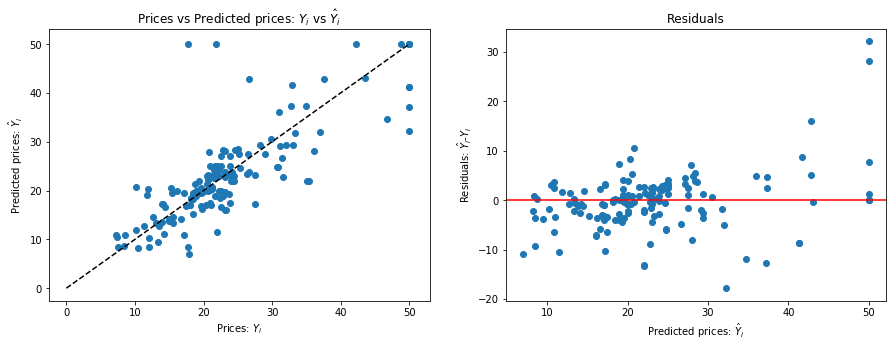

In [45]:
#PCA on Decision Trees
train_and_predict(Transformed_vector,y,tree)

PCA is not beneficial in case of Decision trees

## Conclusion:

Best model in terms of accuracy is Decision tree(tree): 17.49236936(MSE)
Best model in overall terms is Decision tree(tree1): 19.6579613328(MSE) using only 4 predictor variables(['LSTAT','PT','RM','INDUS']).

Linear Regression models have significantly lesser accuracy: 25.549197516(MSE) 
                                                             27.4537704768(MSE) after applying PCA
